In [1]:
#농어의 길이와 무게
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
print(len(perch_length),len(perch_weight))

56 56


In [2]:
from sklearn.model_selection import train_test_split

#농어데이터를 훈련데이터와 테스트데이터로 나눔
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

#훈련데이터와 테스트데이터를 2차원 배열로 생성
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


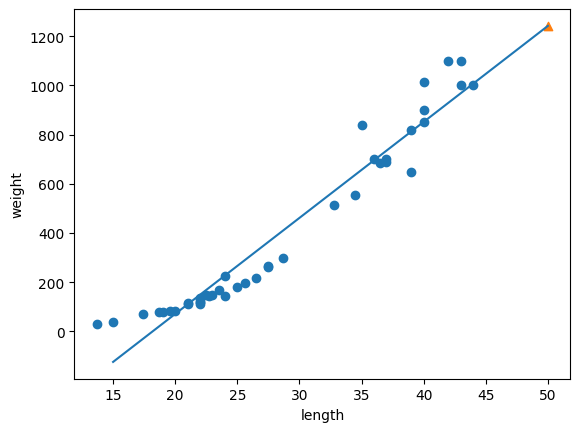

In [3]:
#선형회귀모델을 생성하고 길이가 50인 농어의 무게 예측
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_target)
lr.predict([[50]])

# 산점도 표시
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15, 50], [lr.coef_ * 15 + lr.intercept_, lr.coef_ * 50 + lr.intercept_])
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

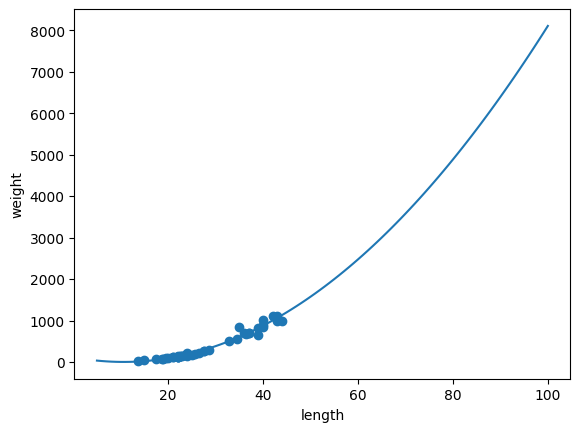

In [5]:
#농어의 길이를 5~100까지 바꿔가며 무게를 예측하고 plot 그래프로 그려보기
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

plr = LinearRegression()
plr.fit(train_poly,train_target)

point = np.arange(5, 101)
plt.scatter(train_input, train_target)
plt.plot(point,plr.coef_[0]*point**2+plr.coef_[1]*point+plr.intercept_)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()